In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sys, copy, os
from tqdm.notebook import tqdm

In [2]:
# define the lorenz system
def lorenz(t, y, beta, rho, sigma):
    
    # unpack + assert derivatives
    X, Y, Z = tuple(y)
    return np.array([sigma*(Y-X), X*(rho-Z) - Y, (X*Y)-beta*Z])

In [3]:
# encode our parameter settings
regimes = [("Stable (Canonical)", (5.0, 5.0, 5.0), (8/3, 6.00, 10.0)), 
           ("Stable (Transient Chaos)", (5.0, 5.0, 5.0), (8/3, 23.00, 10.0)), 
           ("Chaotic (Butterfly)", (5.0, 5.0, 5.0), (8/3, 28.00, 10.0)), 
           ("Chaotic (No Butterfly)", (2.0, 2.0, 2.0), (8/3, 28.00, 10.0))]

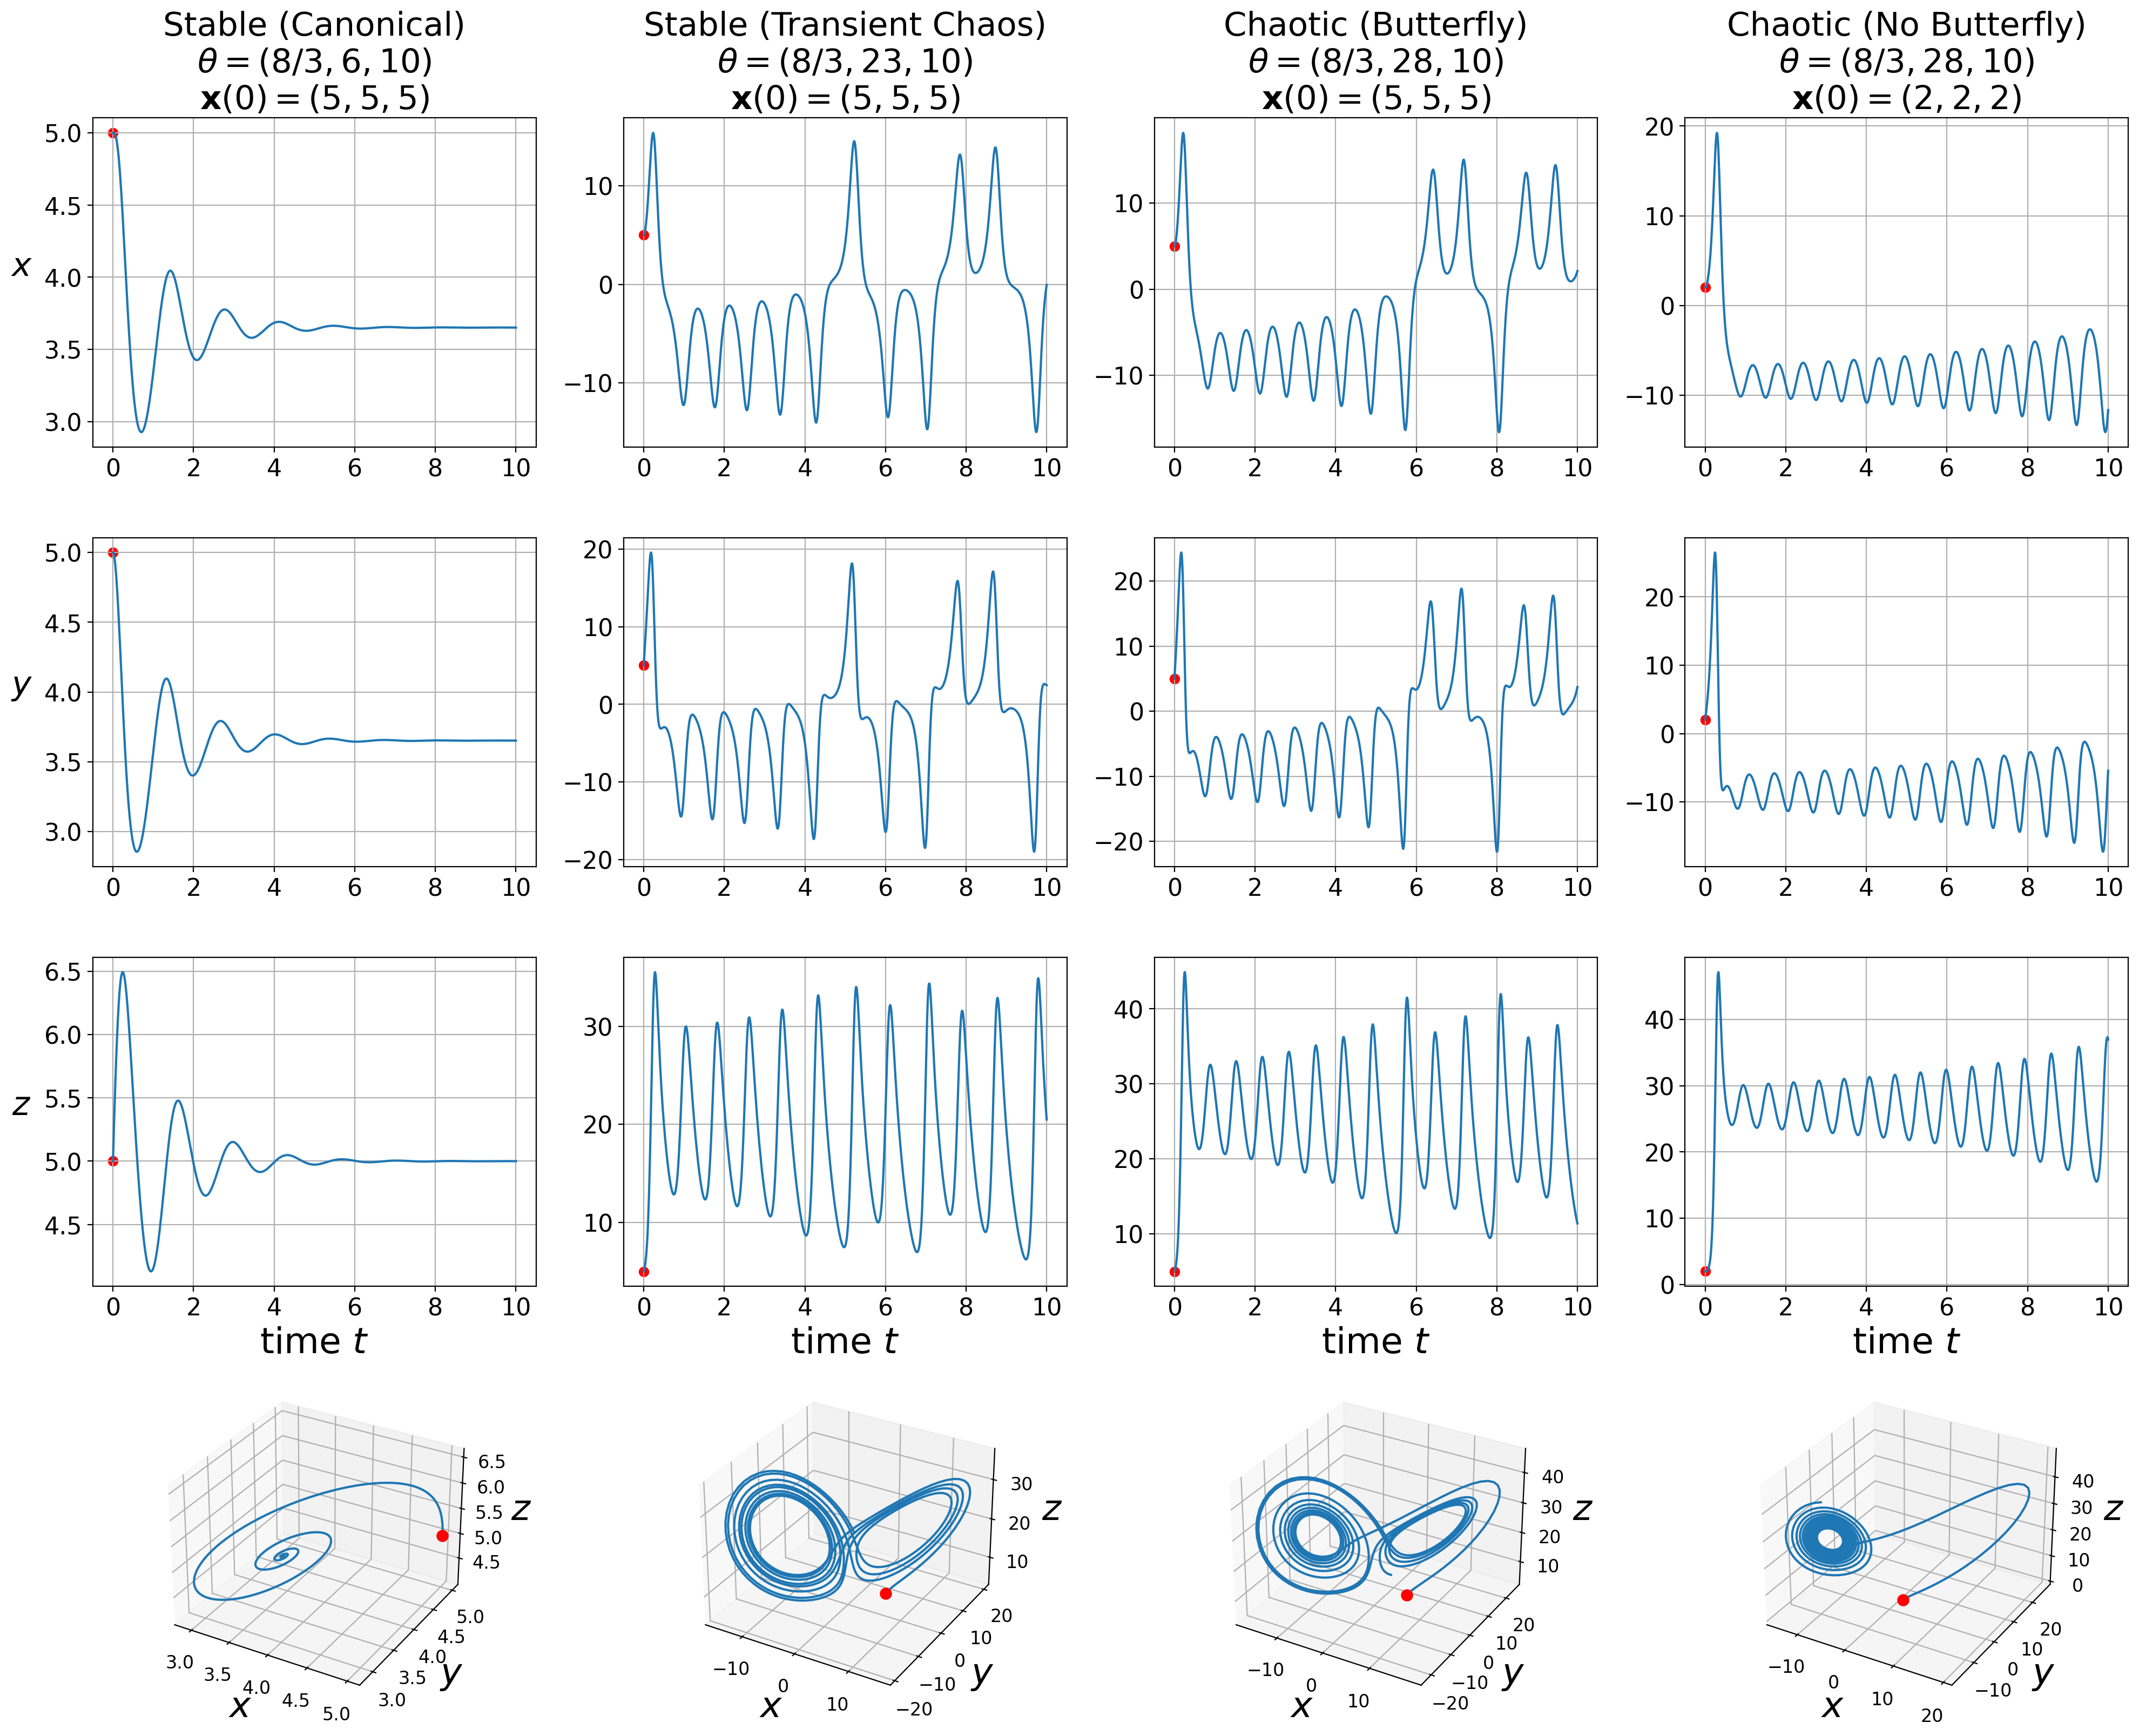

In [8]:
# show TM=10
TM = 10.0
fig, ax = plt.subplots(4, 4, dpi=200, figsize=(20, 16)) 

# hot letters
b, r, s, t, f = "b", "r", "s", "t", "f"

for j, regime in enumerate(regimes):
    
    # unpack the settings
    name, y0, theta = regime
    beta, rho, sigma = theta
    sol = solve_ivp(fun=lorenz, t_span=(0.0, TM), y0=np.array(y0), 
                    t_eval=np.linspace(start=0.0, stop=TM, num=1001), 
                    args=(beta, rho, sigma), rtol=1e-10, atol=1e-10)
    
    # put a title + selectively beautify
    ax[0, j].set_title(name + "\n" + \
                       f"$\{t}heta = (8/3, {int(theta[1])}, 10)$" + "\n" + f"$\mathbf{{x}}(0) = ({int(y0[0])}, {int(y0[0])}, {int(y0[0])})$", fontsize=22)
    
    if j == 0:
        ax[0, j].set_ylabel("$x$", rotation=360, fontsize=22, labelpad=15.0)
        ax[1, j].set_ylabel("$y$", rotation=360, fontsize=22, labelpad=15.0)
        ax[2, j].set_ylabel("$z$", rotation=360, fontsize=22, labelpad=15.0)
    
    # plot our x components
    ax[0, j].plot(sol.t, sol.y.T[:,0])
    ax[0, j].scatter(sol.t[0], sol.y.T[0,0], color="red")
    ax[0, j].tick_params("both", labelsize=16)
    ax[0, j].grid()
    
    # plot our y components
    ax[1, j].plot(sol.t, sol.y.T[:,1])
    ax[1, j].scatter(sol.t[0], sol.y.T[0,1], color="red")
    ax[1, j].tick_params("both", labelsize=16)
    ax[1, j].grid()
    
    # plot our z components
    ax[2, j].plot(sol.t, sol.y.T[:,2])
    ax[2, j].scatter(sol.t[0], sol.y.T[0,2], color="red")
    ax[2, j].tick_params("both", labelsize=16)
    ax[2, j].grid()
    ax[2, j].set_xlabel("time $t$", fontsize=24)
    
    # plot our 3D figure
    plt.delaxes(ax[3, j])
    ax2 = fig.add_subplot(4, 4, 3 * 4 + j + 1, projection='3d')
    ax2.plot(sol.y.T[:,0], sol.y.T[:,1], sol.y.T[:,2])
    ax2.scatter(sol.y.T[0,0], sol.y.T[0,1], sol.y.T[0,2], color="red", s=50)
    ax2.set_xlabel("$x$", fontsize=24)
    ax2.set_ylabel("$y$", fontsize=24)
    ax2.set_zlabel("$z$", fontsize=24)
    ax2.tick_params(axis='x', which='both', labelsize=12)
    ax2.tick_params(axis='y', which='both', labelsize=12)
    ax2.tick_params(axis='z', which='both', labelsize=12)

# beautify at the end
plt.tight_layout()
plt.savefig("figures/regimes_TM=10.png", facecolor="white", bbox_inches="tight")
plt.show()

Finished regime 1
Finished regime 2
Finished regime 3
Finished regime 4


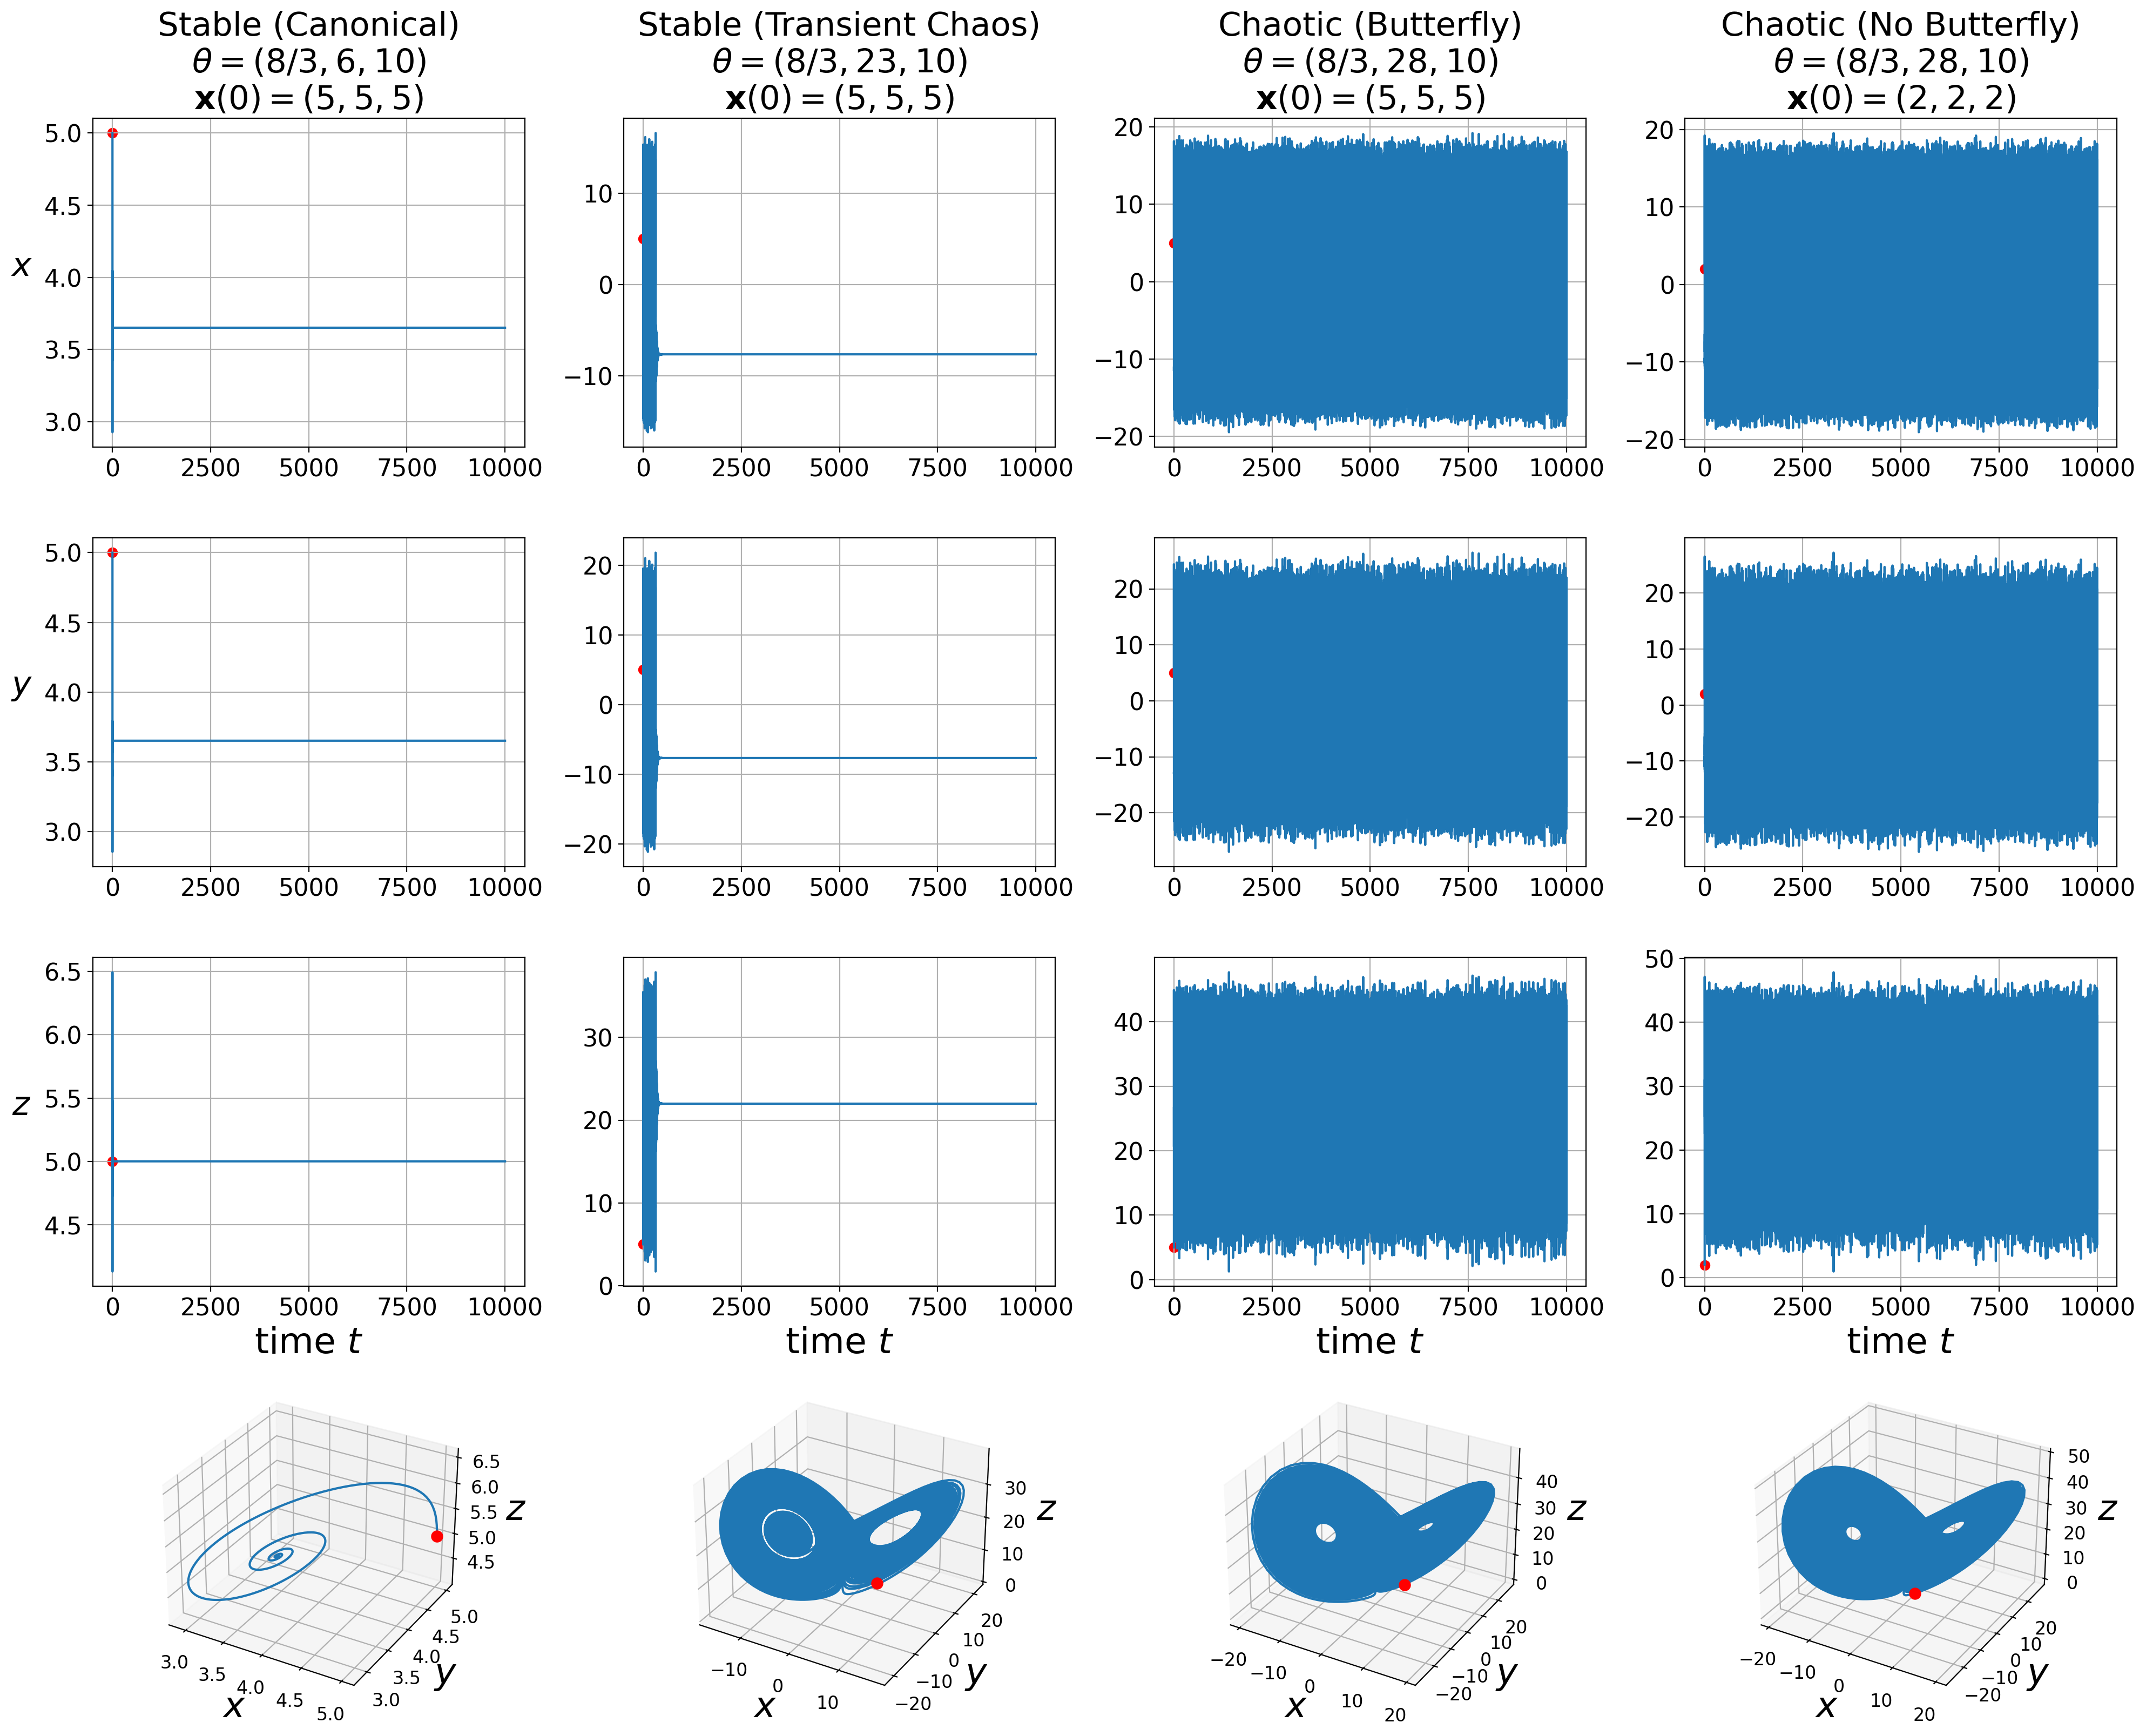

In [9]:
# show TM=10K
TM = 10000
fig, ax = plt.subplots(4, 4, dpi=200, figsize=(20, 16)) 

# hot letters
b, r, s, t, f = "b", "r", "s", "t", "f"

for j, regime in enumerate(regimes):
    
    # unpack the settings
    name, y0, theta = regime
    beta, rho, sigma = theta
    sol = solve_ivp(fun=lorenz, t_span=(0.0, TM), y0=np.array(y0), 
                    t_eval=np.linspace(start=0.0, stop=TM, num=1000001), 
                    args=(beta, rho, sigma), rtol=1e-10, atol=1e-10)
    
    # status update
    print(f"Finished regime {j+1}")
    
    # put a title + selectively beautify
    ax[0, j].set_title(name + "\n" + \
                       f"$\{t}heta = (8/3, {int(theta[1])}, 10)$" + "\n" + f"$\mathbf{{x}}(0) = ({int(y0[0])}, {int(y0[0])}, {int(y0[0])})$", fontsize=22)
    
    if j == 0:
        ax[0, j].set_ylabel("$x$", rotation=360, fontsize=22, labelpad=15.0)
        ax[1, j].set_ylabel("$y$", rotation=360, fontsize=22, labelpad=15.0)
        ax[2, j].set_ylabel("$z$", rotation=360, fontsize=22, labelpad=15.0)
    
    # plot our x components
    ax[0, j].plot(sol.t, sol.y.T[:,0])
    ax[0, j].scatter(sol.t[0], sol.y.T[0,0], color="red")
    ax[0, j].tick_params("both", labelsize=16)
    ax[0, j].grid()
    
    # plot our y components
    ax[1, j].plot(sol.t, sol.y.T[:,1])
    ax[1, j].scatter(sol.t[0], sol.y.T[0,1], color="red")
    ax[1, j].tick_params("both", labelsize=16)
    ax[1, j].grid()
    
    # plot our z components
    ax[2, j].plot(sol.t, sol.y.T[:,2])
    ax[2, j].scatter(sol.t[0], sol.y.T[0,2], color="red")
    ax[2, j].tick_params("both", labelsize=16)
    ax[2, j].grid()
    ax[2, j].set_xlabel("time $t$", fontsize=24)
    
    # plot our 3D figure
    plt.delaxes(ax[3, j])
    ax2 = fig.add_subplot(4, 4, 3 * 4 + j + 1, projection='3d')
    ax2.plot(sol.y.T[:,0], sol.y.T[:,1], sol.y.T[:,2])
    ax2.scatter(sol.y.T[0,0], sol.y.T[0,1], sol.y.T[0,2], color="red", s=50)
    ax2.set_xlabel("$x$", fontsize=24)
    ax2.set_ylabel("$y$", fontsize=24)
    ax2.set_zlabel("$z$", fontsize=24)
    ax2.tick_params(axis='x', which='both', labelsize=12)
    ax2.tick_params(axis='y', which='both', labelsize=12)
    ax2.tick_params(axis='z', which='both', labelsize=12)

# beautify at the end
plt.tight_layout()
plt.savefig("figures/regimes_TM=10K.png", facecolor="white", bbox_inches="tight")
plt.show()